In [1]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [24]:
class data_generator(object):
    def __init__(self,data_points):
        """
        @params
        datapoints = no of datapoints to be generated
        """
        self.x,self.y = make_moons(data_points,noise = 0.1)
        self.y = np.reshape(self.y,(self.y.shape[0],1))
        plt.scatter(self.x[:,0],self.x[:,1],s = 40,c = self.y)
        plt.show()
    def data_set_generator(self,batch_size):
        """
        @params
        batch_size = batch size for training
        """
        i = 0
        while(i<self.x.shape[0]):
            yield self.x[i:i+batch_size,:],self.y[i:i+batch_size,:]
            i += batch_size

In [25]:
class neural_network(object):
    def __init__(self,input_dim,hidden_units,output_dim,batch_size):
        """
        @params
        hidden_units = no.of hidden nodes in the hidden layer
        input_dim = no.of nodes in the input layer
        output_dim = no.of nodes in the output layer
        batch_size = no.of datapoints that are include in a single batch
        """
        self.hidden_units = hidden_units
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.batch_size = batch_size
        self.initialize_weights()
        
    def initialize_weights(self,variance = 0.1):
        """
        @params
        variance = variance of the normal distribution that is used to initialize weights
        """
        self.w1 = self.random_vector(self.input_dim,self.hidden_units,variance)
        self.w2 = self.random_vector(self.hidden_units,self.output_dim,variance)
        self.b1 = np.zeros((self.batch_size,self.hidden_units))
        self.b2 = np.zeros((self.batch_size,self.output_dim))
        
    def feed_forward(self,input_,ground_truth,activation = "sigmoid"):
        """
        @params
        input_ = input to the neural network
        ground_truth = true labels 
        """
        self.input_ = input_
        self.ground_truth = ground_truth
        self.input_w1 = (input_ @ self.w1) + self.b1
        self.input_w1_activated = self.sigmoid(self.input_w1)
        self.output = (self.input_w1_activated @ self.w2) + self.b2
        self.loss = self.loss_fn(self.output,ground_truth)
        return self.loss
    
    def back_prop(self):
        self.d_error = 2*(self.output - self.ground_truth) 
        self.dw2 = self.input_w1_activated.T @ self.d_error
        self.db2 = self.d_error
        self.dw1 = self.input_.T @ ((self.d_error @ self.w2.T) * self.sigmoid_prime(self.input_w1))
        self.db1 = ((self.d_error @ self.w2.T) * self.sigmoid_prime(self.input_w1))
        
    def optimize(self,learning_rate = 0.01):
        """
        @params 
        learning_rate = determines how fast the network learns
        """
        self.w1 -= learning_rate*self.dw1
        self.w2 -= learning_rate*self.dw2
        self.b1 -= learning_rate*self.db1
        self.b2 -= learning_rate*self.db2
    
    def loss_fn(self,output,ground_truth):
        """
        @params
        output = output of the neural network
        ground_truth = labels for learning
        """
        return (output - ground_truth)**2
    
    def sigmoid(self,inp):
        """
        finds the sigmoid activated output of the input matrix
        """
        return (1/(1+np.exp(-inp)))
    
    def sigmoid_prime(self,inp):
        """
        finds the value of the matrix substituted(elementwise) in a sigmoid function derivative
        """
        return (-np.exp(-inp))/(1+np.exp(-inp))
    
    def random_vector(self,first_dim,second_dim,variance):
        """
        @params
        first_dim,second_dim = dimensions of the multivariate gaussian used to sample the weights from
        variance = variance of the 
        """
        mu = np.zeros((first_dim,second_dim))
        covariance = np.ones((first_dim,second_dim))*variance
        return np.random.normal(mu,covariance)

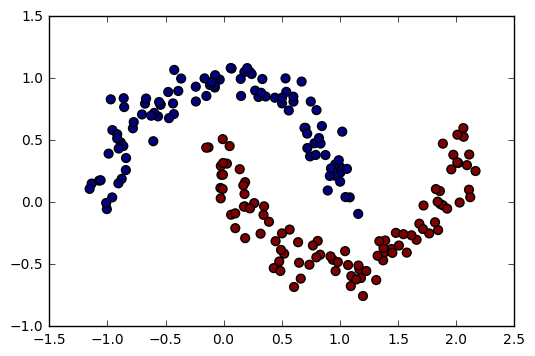

98.0271505108
91.7215542599
86.2386972404
81.4718907046
77.3280995612
73.7262542384
70.5957537116
67.8751431542
65.5109495259
63.4566588968
61.671820176
60.1212610033
58.7744027639
57.6046629065
56.5889339475
55.7071296805
54.9417901776
54.2777381412
53.7017800527
53.2024463615
52.7697656692
52.3950684946
52.0708167688
51.7904556965
51.5482850569
51.3393473952
51.1593308859
51.0044849417
50.8715468921
50.7576782742
50.6604094747
50.5775916225
50.5073547797
50.4480716032
50.3983257578
50.3568844585
50.3226745973
50.2947619878
50.2723333165
50.2546804469
50.2411867695
50.2313153288
50.2245984951
50.2206289806
50.2190520228
50.2195585838
50.2218794326
50.2257799957
50.2310558756
50.2375289509
50.2450439815
50.2534656536
50.2626760079
50.2725722003
50.2830645527
50.2940748555
50.3055348902
50.3173851426
50.3295736823
50.3420551871
50.3547900933
50.3677438555
50.3808863025
50.3941910754
50.4076351391
50.4211983559
50.4348631148
50.4486140083
50.4624375505
50.4763219318
50.4902568054
50.5042

In [28]:
#hyperparameters
input_dim = 2
hidden_nodes = 5
output_dim = 1
batch_size = 2
learning_rate = 0.0001

#class objects for the neural network and the data generator
nn = neural_network(input_dim,hidden_nodes,output_dim,batch_size)
dg = data_generator(200)

#optimization
dataset_size = 200
EPOCH = 100
for _ in range(EPOCH):
    loss = 0
    for x_,y_ in dg.data_set_generator(batch_size):
        nn.feed_forward(x_,y_)
        nn.back_prop()
        nn.optimize(learning_rate)
        loss += np.sum(nn.loss)
    print(loss)
nn.feed_forward(x[1:2,:],y[1:2,:])
print(nn.output)
print(x[11:13,:],y[11:13,:])